In [562]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

preview_count = 10
suspicious_flight_threshold_1 = 10
suspicious_flight_threshold_2 = 20

hypotheses_weights = [
    1,
    1,
    0.5,
    0.3,
    0.5,
    0.6,
]
suspicious_passengers = {}
suspicious_score_threshold = 1

## 0. Load data

In [563]:
df_joined = pd.read_csv('joined/joined.csv', parse_dates=['PassengerBirthDate', 'DepartureDate'])
df_joined.head(preview_count)

,ArrivalCity,BaggageState,BookingCode,CodeShare,DepartureDate,DepartureTime,FlightNumber,PassengerBirthDate,PassengerDocument,PassengerFirstName,...,BaggageCount,DepartureAirport,Fare,Meal,PassengerAdditionalInfo,PassengerClass,ArrivalCountry,DepartureCity,DepartureCountry,PassengerNickName
0,Moscow,Transit,WMXPVY,False,2017-01-01,09:15,SU1001,1999-12-13,5140 683757,ALISA,...,1PC,KGD,YFLXYW,RVML,F,Y,NaN,NaN,NaN,NaN
1,NaN,NaN,ULCPQH,False,2017-01-01,09:15,SU1001,NaT,7477 017451,KRISTINA,...,NaN,KGD,YFLXEY,NaN,NaN,Y,NaN,NaN,NaN,NaN
2,NaN,NaN,YVICRN,False,2017-01-01,09:15,SU1001,NaT,6840 635650,ALEKSANDR,...,1PC,KGD,YSTNUB,NaN,4 FF#FB 483772175,Y,NaN,NaN,NaN,NaN
3,Moscow,Registered,NaN,False,2017-01-01,09:15,SU1001,1974-07-09,1205 586135,MARK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,DBEVCU,False,2017-01-01,09:15,SU1001,1990-05-04,6601 454145,VASILISA,...,1PC,KGD,YGRPPY,VGML,0 FF#SU 806242829,Y,NaN,NaN,NaN,NaN
5,NaN,NaN,RRIOPR,False,2017-01-01,09:15,SU1001,1993-08-19,8514 626986,ROMAN,...,NaN,KGD,YGRPCF,NaN,Assistance Required,Y,NaN,NaN,NaN,NaN
6,Moscow,Transit,QVSCOZ,False,2017-01-01,09:15,SU1001,1977-04-27,9115 247669,VALENTINA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Moscow,Transit,NaN,False,2017-01-01,09:15,SU1001,1975-06-18,7343 212984,GEORGII,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Moscow,Transit,HSMLZA,False,2017-01-01,09:15,SU1001,1971-10-04,1781 401081,AIDAR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Moscow,None,JCPZFV,False,2017-01-01,09:15,SU1001,1989-10-23,4652 149463,BORIS,...,NaN,KGD,JGRPMO,NaN,T FF#DT 671389892,J,NaN,NaN,NaN,NaN


In [564]:
df_exch = pd.read_csv('preprocessed/SkyTeamExchange.csv')
df_exch.head(preview_count)

,Unnamed: 0,Passanger,Date,Fligth code,Departure,Arrival,Class,Fare
0,0.0,DT 819946195,2017-09-28,AF1000,CDG,MAD,Y,YFLXDV
1,1.0,KE 924442970,2017-09-28,AF1007,DUS,CDG,A,AFLXPB
2,2.0,DT 712523868,2017-09-28,AF1019,FRA,CDG,P,PSTNGR
3,3.0,FB 573423840,2017-09-28,AF102,CDG,CAN,Y,YGRPEZ
4,4.0,FB 283064549,2017-09-28,AF1022,CDG,MUC,A,ARSTRF
5,5.0,DT 94418548,2017-09-28,AF1028,CDG,BLQ,Y,YRSTQS
6,6.0,DT 743859674,2017-09-28,AF1029,BLQ,CDG,Y,YRSTBP
7,7.0,KE 661563277,2017-09-28,AF1029,BLQ,CDG,Y,YSTNTF
8,8.0,DT 38897067,2017-09-28,AF1062,CDG,ARN,Y,YGRPGZ
9,9.0,KE 719723558,2017-09-28,AF1065,BHX,CDG,Y,YFLXEH


In [565]:
df_points = pd.read_csv('preprocessed/PointzAggregator-AirlinesDate2.csv')
df_points.head(preview_count)

,Unnamed: 0,uid,First name,Last name,Card type,Bonusprogramm,Activity type,Flight code,Date,Departure,Arrival,Fare
0,0,613142142,IAROMIR,ZVEREV,Airlines,Flying Blue,Airlines,KE827,2017-08-06,rea,SZX,YGRPZT
1,1,613142142,IAROMIR,ZVEREV,Airlines,Flying Blue,Airlines,MU9706,2017-10-26,PEK,BSD,YSTNYV
2,2,103197717,VITALINA,KOROVINA,Airlines,Korean Air SKYPASS,Airlines,DL5058,2017-09-11,CHA,ATL,YRSTKY
3,3,103197717,VITALINA,KOROVINA,Airlines,Korean Air SKYPASS,Airlines,KE1,2017-04-01,rea,HNL,PRSTRU
4,4,103197717,VITALINA,KOROVINA,Airlines,Korean Air SKYPASS,Airlines,DL837,2017-09-13,ATL,HNL,YGRPNG
5,5,103197717,VITALINA,KOROVINA,Airlines,Korean Air SKYPASS,Airlines,SU1523,2017-02-12,NUX,SVO,YFLXPS
6,6,138879468,DANIL,VAVILOV,Airlines,Delta SkyMiles,Airlines,AF4445,2017-11-11,AJA,ORY,YSTNMG
7,7,138879468,DANIL,VAVILOV,Airlines,Delta SkyMiles,Airlines,AZ7545,2017-03-07,FCO,PRG,ASTNZL
8,8,138879468,DANIL,VAVILOV,Airlines,Delta SkyMiles,Airlines,AF7331,2017-09-17,MLH,ORY,YSTNOE
9,9,138879468,DANIL,VAVILOV,Airlines,Delta SkyMiles,Airlines,AF4102,2017-10-07,ORY,AJA,YSTNJD


In [566]:
df_boardpasses = pd.read_csv('preprocessed/boarding_passes.csv', delimiter=';')
df_boardpasses.head(preview_count)

,sequence,gender,name,agency,flight,from,to,airport_from,airport_to,date,time,pnr,e-ticket
0,32,MRS,LIDIYA ZHDANOVA,NaN,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-01-01,11:25,DYELAO,7100246988860481
1,50,MR,SVIATOSLAV SOKOLOV,NaN,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-01-01,11:25,JWARRD,7608904175905333
2,32,MR,SVIATOSLAV SUKHANOV,NaN,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-01-01,11:25,SETJJH,527257587351371
3,77,MR,DENIS ZELENIN,NaN,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-01-01,11:25,MZZNJI,3696048365585673
4,87,MRS,OSTROVSKAYA IRINA,NaN,SU5436,VLADIVOSTOK,SEOUL,VVO,REA,2017-01-01,11:25,NJNNPC,7470610229847684
5,77,MRS,ISAKOVA VERA,NaN,SU5642,KHABAROVSK,NOVOSIBIRSK,KHV,OVB,2017-01-01,19:25,PCJDQU,2207650722148272
6,81,MRS,ZVYAGINTSEVA AL'BINA R,NaN,SU5642,KHABAROVSK,NOVOSIBIRSK,KHV,OVB,2017-01-01,19:25,UDXDFD,5088998931607787
7,76,MRS,ISAKOVA AL'BINA V,NaN,SU6330,KALININGRAD,SAINT PETERSBURG,KGD,LED,2017-01-01,17:50,HOHNEI,6918115548996527
8,53,MRS,ANTONINA KOROL'KOVA,NaN,SU6330,KALININGRAD,SAINT PETERSBURG,KGD,LED,2017-01-01,17:50,BPYCCJ,4460236055678810
9,5,MRS,ZOLOTOVA SVETLANA,NaN,SU6330,KALININGRAD,SAINT PETERSBURG,KGD,LED,2017-01-01,17:50,UXQREL,4591214625648674


In [567]:
df_forum = pd.read_csv('preprocessed/FrequentFlyerForumFlights.csv')
df_forum.head(preview_count)

,ArrivalAirport,ArrivalCity,ArrivalCountry,CodeShare,DepartureAirport,DepartureCity,DepartureCountry,DepartureDate,FlightNumber,PassengerFirstName,PassengerLastName,PassengerNickName,PassengerSex
0,PIT,Pittsburgh PA,United States of,False,BOS,Boston MA,United States of,2017-03-04,DL3377,NaN,NaN,FrequentFlyer0,Male
1,DTW,Detroit MI,United States of,False,GRB,Green Bay WI,United States of,2017-07-21,DL3630,NaN,NaN,FrequentFlyer0,Male
2,LGA,New York NY,United States of,False,PIT,Pittsburgh PA,United States of,2017-03-22,DL5361,NaN,NaN,FrequentFlyer0,Male
3,WAW,Warsaw,Poland,True,SVO,Moscow,Russian Federation,2017-01-04,SU3702,NaN,NaN,FrequentFlyer0,Male
4,ATL,Atlanta GA,United States of,False,XNA,Fayetteville AR,United States of,2017-08-08,DL3412,NaN,NaN,FrequentFlyer0,Male
5,FLL,Fort Lauderdale FL,United States,False,ATL,Atlanta GA,United States of,2017-08-30,DL659,NaN,NaN,FrequentFlyer0,Male
6,ATL,Atlanta GA,United States of,False,ILM,Wilmington NC,United States of,2017-06-10,DL5032,NaN,NaN,FrequentFlyer0,Male
7,OAJ,Jacksonville NC,United States of,False,ATL,Atlanta GA,United States of,2017-11-10,DL3363,NaN,NaN,FrequentFlyer0,Male
8,SMF,Sacramento CA,United States of,False,ATL,Atlanta GA,United States of,2017-12-14,DL1364,NaN,NaN,FrequentFlyer0,Male
9,BOS,Boston MA,United States of,True,CDG,Paris,France,2017-02-27,AF3616,NaN,NaN,FrequentFlyer0,Male


In [568]:
df_timetable = pd.read_csv('preprocessed/timetable.csv')
df_timetable.head(preview_count)

,validity,days,dep_time,arr_time,flight,aircraft,travel_time,from_value,to_value
0,1 Nov - 31 Ja,1234567,06:00,07:25,KL1328,73W,1H25M,"['Aalborg,', 'Denmark', 'AAL']","['Amsterdam', 'Netherlands', 'AMS']"
1,1 Nov - 31 Ja,1234567,10:05,11:30,KL1333,73W,1H25M,"['Amsterdam', 'Netherlands', 'AMS']","['Aalborg,', 'Denmark', 'AAL']"
2,1 Nov - 31 Ja,1234567,12:10,13:35,KL1334,73W,1H25M,"['Aalborg,', 'Denmark', 'AAL']","['Amsterdam', 'Netherlands', 'AMS']"
3,1 Nov - 23 De,1234567,16:25,17:45,KL1335,EQV,1H20M,"['Amsterdam', 'Netherlands', 'AMS']","['Aalborg,', 'Denmark', 'AAL']"
4,1 Nov - 23 De,1234567,18:15,19:35,KL1336,EQV,1H20M,"['Aalborg,', 'Denmark', 'AAL']","['Amsterdam', 'Netherlands', 'AMS']"
5,26 Dec - 6 Ja,"1, 34567",16:25,17:45,KL1335,EQV,1H20M,"['Amsterdam', 'Netherlands', 'AMS']","['Aalborg,', 'Denmark', 'AAL']"
6,26 Dec - 6 Ja,"1, 34567",18:15,19:35,KL1336,EQV,1H20M,"['Aalborg,', 'Denmark', 'AAL']","['Amsterdam', 'Netherlands', 'AMS']"
7,7 Jan - 31 Ja,1234567,16:25,17:45,KL1335,EQV,1H20M,"['Amsterdam', 'Netherlands', 'AMS']","['Aalborg,', 'Denmark', 'AAL']"
8,7 Jan - 31 Ja,1234567,18:15,19:35,KL1336,EQV,1H20M,"['Aalborg,', 'Denmark', 'AAL']","['Amsterdam', 'Netherlands', 'AMS']"
9,1 Nov - 31 Ja,1234567,21:00,22:20,KL1337,73W,1H20M,"['Amsterdam', 'Netherlands', 'AMS']","['Aalborg,', 'Denmark', 'AAL']"


In [569]:
df_suspicious_by_bonus = pd.read_csv('final/suspicious_1.csv')
df_suspicious_by_bonus.head(preview_count)


,PassengerLastName,PassengerFirstName,FlightCount
0,ANTONOV,DMITRII,21
1,ERMILOV,SERGEI,22
2,GONCHAROVA,MARIIA,21
3,GRIBOVA,TATIANA,25
4,KOLTSOVA,OKSANA,22
5,KOZLOVSKAIA,AMALIIA,26
6,MALTSEV,VLAD,23
7,PLOTNIKOVA,LIANA,21
8,VYSOTSKII,EMIL,21


## 1. Unique directions / all flights ratio for every passenger
Also look for unique arrival cities by passenger

In [570]:
df_joined['FlightDirection'] = df_joined['ArrivalAirport'] + ' ' + df_joined['DepartureAirport']
df_joined['PassengerName'] = df_joined['PassengerFirstName'] + ' ' + df_joined['PassengerLastName']
df_joined.head()

,ArrivalCity,BaggageState,BookingCode,CodeShare,DepartureDate,DepartureTime,FlightNumber,PassengerBirthDate,PassengerDocument,PassengerFirstName,...,Fare,Meal,PassengerAdditionalInfo,PassengerClass,ArrivalCountry,DepartureCity,DepartureCountry,PassengerNickName,FlightDirection,PassengerName
0,Moscow,Transit,WMXPVY,False,2017-01-01,09:15,SU1001,1999-12-13,5140 683757,ALISA,...,YFLXYW,RVML,F,Y,NaN,NaN,NaN,NaN,SVO KGD,ALISA ABRAMOVA
1,NaN,NaN,ULCPQH,False,2017-01-01,09:15,SU1001,NaT,7477 017451,KRISTINA,...,YFLXEY,NaN,NaN,Y,NaN,NaN,NaN,NaN,SVO KGD,KRISTINA ARTEMOVA
2,NaN,NaN,YVICRN,False,2017-01-01,09:15,SU1001,NaT,6840 635650,ALEKSANDR,...,YSTNUB,NaN,4 FF#FB 483772175,Y,NaN,NaN,NaN,NaN,SVO KGD,ALEKSANDR BABUSHKIN
3,Moscow,Registered,NaN,False,2017-01-01,09:15,SU1001,1974-07-09,1205 586135,MARK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MARK BEREZIN
4,NaN,NaN,DBEVCU,False,2017-01-01,09:15,SU1001,1990-05-04,6601 454145,VASILISA,...,YGRPPY,VGML,0 FF#SU 806242829,Y,NaN,NaN,NaN,NaN,SVO KGD,VASILISA BLINOVA


In [571]:
unique_flight_directions = df_joined.groupby(['PassengerName'])['FlightDirection'].nunique()
unique_flight_directions

PassengerName
ADEL AFANASEV         0
ADEL AGEEV            3
ADEL AKIMOV           3
ADEL AKSENOV          3
ADEL ALEKSANDROV      1
                     ..
ZLATA ZOTOVA          1
ZLATA ZUBOVA          4
ZLATA ZVEREVA         1
ZLATA ZVIAGINTSEVA    3
ZLATA ZYKOVA          1
Name: FlightDirection, Length: 63076, dtype: int64

In [572]:
flight_counts = df_joined['PassengerName'].value_counts()
flight_counts

STANISLAV BOBROV           35
MIROSLAVA LAPTEVA          31
SABINA SHMELEVA            29
ILIA RAKOV                 28
VASILINA POTAPOVA          28
                           ..
VIKTOR IVANOV               1
BORIS KOZYREV               1
ALEKSANDRA KALASHNIKOVA     1
IAROSLAV KORCHAGIN          1
RINAT RUMIANTSEV            1
Name: PassengerName, Length: 63076, dtype: int64

In [573]:
ratio = {}
for name in df_joined['PassengerName'].unique():
    if flight_counts[name] > suspicious_flight_threshold_1:
        ratio[name] = unique_flight_directions[name] / flight_counts[name]

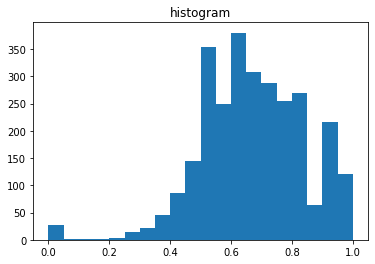

In [574]:
ax = np.histogram(np.array(list(ratio.values())), bins=32)
plt.hist(np.array(list(ratio.values())), bins=20)
plt.title("histogram")
plt.show()

In [575]:
for n, r in ratio.items():
    if r < 0.15:
        suspicious_passengers[n] = suspicious_passengers.get(n, 0) + hypotheses_weights[0]

In [576]:
uniqueCity = df_joined.groupby(['PassengerName'])['ArrivalCity'].nunique()
uniqueCity

PassengerName
ADEL AFANASEV         1
ADEL AGEEV            1
ADEL AKIMOV           2
ADEL AKSENOV          3
ADEL ALEKSANDROV      2
                     ..
ZLATA ZOTOVA          1
ZLATA ZUBOVA          3
ZLATA ZVEREVA         0
ZLATA ZVIAGINTSEVA    2
ZLATA ZYKOVA          1
Name: ArrivalCity, Length: 63076, dtype: int64

In [577]:
ratioCity = []
for name in df_joined['PassengerName'].unique():
    if flight_counts[name] > suspicious_flight_threshold_1:
        ratioCity.append(uniqueCity[name] / flight_counts[name])

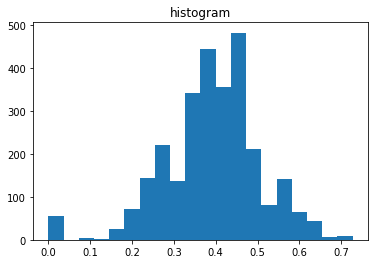

In [578]:
ax = np.histogram(np.array(ratioCity), bins=32)
plt.hist(np.array(ratioCity), bins=20)
plt.title("histogram")
plt.show()

## 2. Passengers that fly frequently but don't get bonuses

In [579]:
df_suspicious_by_bonus.head(suspicious_flight_threshold_2)
df_suspicious_by_bonus['PassengerName'] = df_suspicious_by_bonus['PassengerFirstName'] + ' ' + df_suspicious_by_bonus[
    'PassengerLastName']
for index, row in df_suspicious_by_bonus.iterrows():
    suspicious_passengers[row['PassengerName']] = suspicious_passengers.get(row['PassengerName'], 0) + hypotheses_weights[1]

## 3. Passengers that fly frequently but are not registered on fly forums

In [580]:
df_forum['PassengerName'] = df_forum['PassengerFirstName'] + ' ' + df_forum['PassengerLastName']
df_points['PassengerName'] = df_points['First name'] + ' ' + df_points['Last name']

In [581]:
strange = 0
forum_names = df_forum['PassengerName'].unique()
for name in df_joined['PassengerName'].unique():
    if flight_counts[name] > suspicious_flight_threshold_2 and name not in forum_names:
        strange += 1
strange

54

In [582]:
not_strange = 0
forum_names = df_forum['PassengerName'].unique()
for name in df_joined['PassengerName'].unique():
    if flight_counts[name] > suspicious_flight_threshold_2 and name in forum_names:
        not_strange += 1
not_strange

32

In [583]:
strange = 0
points_names = df_points['PassengerName'].unique()
for name in df_joined['PassengerName'].unique():
    if flight_counts[name] > suspicious_flight_threshold_2 and name not in points_names:
        strange += 1
        suspicious_passengers[name] = suspicious_passengers.get(name, 0) + hypotheses_weights[2]
strange

9

In [584]:
not_strange = 0
points_names = df_points['PassengerName'].unique()
for name in df_joined['PassengerName'].unique():
    if flight_counts[name] > suspicious_flight_threshold_2 and name in points_names:
        not_strange += 1
not_strange


77

## 4. CodeShare flights ration to usual flights by passenger

In [585]:
codeShare = df_joined.query('CodeShare == True')
codeShare

,ArrivalCity,BaggageState,BookingCode,CodeShare,DepartureDate,DepartureTime,FlightNumber,PassengerBirthDate,PassengerDocument,PassengerFirstName,...,Fare,Meal,PassengerAdditionalInfo,PassengerClass,ArrivalCountry,DepartureCity,DepartureCountry,PassengerNickName,FlightDirection,PassengerName
6712,Yuzhno,Delayed,AGCVSJ,True,2017-01-01,07:05,SU4130,1992-01-27,0538 681395,NATALIA,...,YFLXVG,NaN,Assistance Required,Y,NaN,NaN,NaN,NaN,UUS VVO,NATALIA BABUSHKINA
6713,Yuzhno,Registered,DOHJZR,True,2017-01-01,07:05,SU4130,1974-03-06,9977 548182,ARINA,...,YRSTJJ,NaN,Travel with infant,Y,Russian Federation,Vladivostok,Russian Federation,FrequentFlyer40299,UUS VVO,ARINA BOCHAROVA
6714,Yuzhno,Delayed,YEZBIG,True,2017-01-01,07:05,SU4130,1984-02-25,5289 416743,LIUBOV,...,YRSTZA,HNML,#,Y,NaN,NaN,NaN,NaN,UUS VVO,LIUBOV BOLDYREVA
6715,Yuzhno,Transit,DMMOKB,True,2017-01-01,07:05,SU4130,1995-01-09,7169 765178,OLESIA,...,YRSTSI,NaN,F,Y,NaN,NaN,NaN,NaN,UUS VVO,OLESIA FOMINA
6716,Yuzhno,Transit,MQOQVP,True,2017-01-01,07:05,SU4130,1970-02-12,0281 031807,ARINA,...,YFLXTV,NaN,F,Y,NaN,NaN,NaN,NaN,UUS VVO,ARINA RUSAKOVA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239577,NaN,NaN,KJWYKV,True,2017-12-31,12:10,SU4606,NaT,9544 983593,KSENIIA,...,YGRPMJ,STML,F,Y,NaN,NaN,NaN,NaN,KHV OHH,KSENIIA PLATONOVA
239694,NaN,NaN,FMODNG,True,2018-01-01,09:00,SU4599,1978-10-08,7852 822707,AMINA,...,YGRPWF,VGML,NaN,Y,NaN,NaN,NaN,NaN,NGK KHV,AMINA ZAHAROVA
239695,Nogliki,Registered,NaN,True,2018-01-01,09:00,SU4599,1978-10-08,7852 822707,AMINA,...,NaN,NaN,NaN,NaN,Russian Federation,Khabarovsk,Russian Federation,FrequentFlyer65362,NGK KHV,AMINA ZAKHAROVA
239696,NaN,NaN,ZAYCLP,True,2018-01-01,09:00,SU4599,1974-10-21,6024 460423,MARGARITA,...,YGRPDI,NaN,NaN,Y,NaN,NaN,NaN,NaN,NGK KHV,MARGARITA ZOTOVA


In [586]:
codeShareCounts = codeShare['PassengerName'].value_counts()
codeShareCounts

ALLA RUSAKOVA         11
VARVARA MINAEVA       11
ALINA ZHAROVA         10
AMELIIA KONOVALOVA    10
ELENA ROZANOVA         9
                      ..
RADMIR MIKHAILOV       1
MIROSLAV MALTSEV       1
ALISA LUKIANOVA        1
ADEL LEONTEV           1
MARGARITA ZOTOVA       1
Name: PassengerName, Length: 8370, dtype: int64

In [587]:
names = df_joined['PassengerName'].value_counts()
names

STANISLAV BOBROV           35
MIROSLAVA LAPTEVA          31
SABINA SHMELEVA            29
ILIA RAKOV                 28
VASILINA POTAPOVA          28
                           ..
VIKTOR IVANOV               1
BORIS KOZYREV               1
ALEKSANDRA KALASHNIKOVA     1
IAROSLAV KORCHAGIN          1
RINAT RUMIANTSEV            1
Name: PassengerName, Length: 63076, dtype: int64

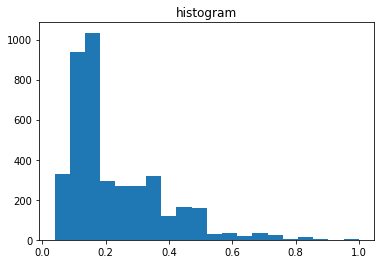

In [588]:
ratioCodeShare = {}
for name in codeShare['PassengerName'].unique():
    if names[name] > 5:
        ratioCodeShare[name] = codeShareCounts[name] / names[name]

plt.hist(np.array(list(ratioCodeShare.values())), bins=20)
plt.title("histogram")
plt.show()

for n, r in ratioCodeShare.items():
    if r > 0.5:
        suspicious_passengers[n] = suspicious_passengers.get(n, 0) + hypotheses_weights[3]

## 5. Подозрительное использование тарифов
### Тариф (Fare) и класс (Class) билета

На что влияет Fare:
1. Возможность обмена / возврата
2. Возможность апгрейда на более дорогой билет
3. Ограничения на время пребывания
4. Получение бонусов (за некоторые тарифы бонусы начисляются только частично)

Классы (https://your.yale.edu/work-yale/campus-services/travel/air-travel/airfare-codes)
1. A - First Class Discounted
2. J - Business Class Premium
3. P - First Class Premium
4. Y - Economy/Coach

Другие символы в Fare Basis Code (https://en.wikipedia.org/wiki/Fare_basis_code#Booking_class)
- E на второй позиции - Excursion (мин. и макс. время пребывания, актуально для туров). Не обнаружил
- H or L на любой позиции, кроме первой - высокий или низкий сезон. Не нашел опред. паттерна
- OW на любой позиции - только в одну сторону. Есть несколько билетов
- RT на любой позиции - обратный проезд (или билет в 2 стороны?). Есть несколько билетов
- NR на любой позиции - без рефанда. Есть несколько билетов
- CH, IN на любой позиции - детские билеты. Есть несколько билетов

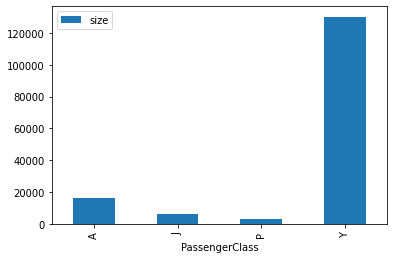

In [589]:
counts = df_joined.groupby(['PassengerClass'], as_index=False).size()
counts.plot(kind='bar', x='PassengerClass', y='size')

for index, row in df_joined.iterrows():
    if row['PassengerClass'] == 'P':
        name = row['PassengerName']
        suspicious_passengers[name] = suspicious_passengers.get(name, 0) + hypotheses_weights[4]

Ожидаемо, самый популярный класс - Economy.
Можно считать подозрительныыми пассажиров, летающих остальными классами (они могли покупать билет в последний момент)


Попробуем применить эвристики для поиска вышеописанных паттернов в кодах тарифов.

Пассажиры, купившие билеты в 1 сторону

In [590]:
joined_data = df_joined[df_joined['Fare'].notna()]
one_way = joined_data[joined_data['Fare'].str.contains('OW')]
one_way.head(preview_count)

for index, row in one_way.iterrows():
    name = row['PassengerName']
    suspicious_passengers[name] = suspicious_passengers.get(name, 0) + hypotheses_weights[5]

Дети

In [591]:
joined_data = joined_data[joined_data['Fare'].notna()]
children = joined_data[joined_data['Fare'].str.contains('CH') | joined_data['Fare'].str.contains('IN')]
children.head(preview_count)

children_set = set()
for index, row in children.iterrows():
    name = row['PassengerName']
    children_set.add(name)

Как видно из результата, гипотеза про детей неверная. Лучше проверять, сравнивая дату вылета и дату рождения

In [592]:
joined_data = joined_data[joined_data['PassengerBirthDate'].notna()]
children = joined_data[(joined_data['DepartureDate'] - joined_data['PassengerBirthDate']) / np.timedelta64(1, 'Y') < 18]
children.head(preview_count)


,ArrivalCity,BaggageState,BookingCode,CodeShare,DepartureDate,DepartureTime,FlightNumber,PassengerBirthDate,PassengerDocument,PassengerFirstName,...,Fare,Meal,PassengerAdditionalInfo,PassengerClass,ArrivalCountry,DepartureCity,DepartureCountry,PassengerNickName,FlightDirection,PassengerName
0,Moscow,Transit,WMXPVY,False,2017-01-01,09:15,SU1001,1999-12-13,5140 683757,ALISA,...,YFLXYW,RVML,F,Y,NaN,NaN,NaN,NaN,SVO KGD,ALISA ABRAMOVA
12,NaN,NaN,PYFKRO,False,2017-01-01,09:15,SU1001,2000-08-01,0779 484874,VASILII,...,YSTNOI,NaN,4 FF#DT 29174451,Y,NaN,NaN,NaN,NaN,SVO KGD,VASILII KONDRATEV
31,NaN,NaN,ZXHOWW,False,2017-01-01,12:45,SU1003,1999-01-18,54 0905966,ADEL,...,AGRPUZ,NaN,FF#FB 980143300,A,NaN,NaN,NaN,NaN,SVO KGD,ADEL KULAGIN
93,Moscow,NaN,VDQXMP,False,2017-01-01,08:25,SU1052,1999-09-30,84 6942030,EGOR,...,YFLXTS,HNML,F,Y,Russian Federation,Makhachkala,Russian Federation,FrequentFlyer83182,SVO MCX,EGOR ALESHIN
110,Moscow,Registered,RUOQOV,False,2017-01-01,08:25,SU1052,2000-12-05,6870 525370,VASILISA,...,YSTNNO,NaN,F FF#FB 169260206,Y,Russian Federation,Makhachkala,Russian Federation,FrequentFlyer63367,SVO MCX,VASILISA ROZHKOVA
122,NaN,NaN,CEVVEG,False,2017-01-01,08:25,SU1052,1999-10-11,0400 066182,TIMOFEI,...,YRSTSA,NaN,E FF#KE 245158365,Y,NaN,NaN,NaN,NaN,SVO MCX,TIMOFEI ZVIAGINTSEV
190,Moscow,NaN,JLEEFN,False,2017-01-01,22:05,SU1056,1999-05-27,4360 875198,VLADISLAVA,...,YSTNHG,NaN,F,Y,Russian Federation,Makhachkala,Russian Federation,FrequentFlyer78965,SVO MCX,VLADISLAVA STAROSTINA
192,Moscow,Transit,VRUZFZ,False,2017-01-01,22:05,SU1056,1999-07-05,9446 089538,KONSTANTIN,...,YGRPLU,NaN,F,Y,NaN,NaN,NaN,NaN,SVO MCX,KONSTANTIN VOLOSHIN
219,Moscow,None,ITAOYF,False,2017-01-01,01:45,SU1057,1999-03-08,0778 872972,VERA,...,YRSTRO,NaN,NaN,Y,NaN,NaN,NaN,NaN,SVO MCX,VERA SELEZNEVA
323,Moscow,None,DSZDLF,False,2017-01-01,20:40,SU1107,1999-03-06,5604 264572,VLADA,...,YFLXQD,FPML,NaN,Y,NaN,NaN,NaN,NaN,SVO KRR,VLADA POZDNIAKOVA


## Additional hypotheses

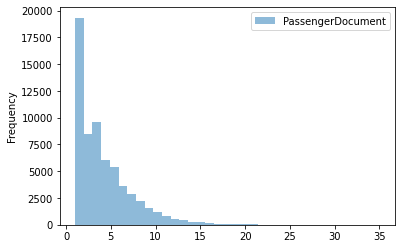

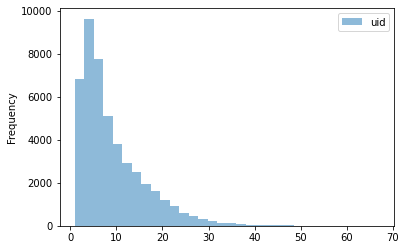

In [593]:
counts = df_joined.groupby(['PassengerFirstName'] + ['PassengerLastName'])[['PassengerDocument']].count()
ax = counts.plot.hist(bins=35, alpha=0.5)

counts = df_points.groupby(['First name'] + ['Last name'])[['uid']].count()
ax = counts.plot.hist(bins=32, alpha=0.5)

In [594]:
counts = df_joined['AgentInfo'].value_counts()
counts

Go2See         12157
OZON.travel    12153
Travelgenio    12123
OneTwoTrip     12096
KupiBilet      12011
Aeroflot       12001
trip.ru        11984
City.Travel    11885
Kiwi.com       11871
Aerobilet      11867
Tickets.ru     11860
eDreams        11811
Name: AgentInfo, dtype: int64

## Show all suspicious passengers with rating

In [595]:
import operator

for name in children_set:
    suspicious_passengers.pop(name, None)
for name in children_set:
    suspicious_passengers.pop(name, None)
suspicious_passengers = {name: score for name, score in suspicious_passengers.items() if
                         score >= suspicious_score_threshold}

sorted_suspicious_passengers = sorted(suspicious_passengers.items(), key=operator.itemgetter(1), reverse=True)

df_suspicious = pd.DataFrame(sorted_suspicious_passengers, columns=['Name', 'Score'])
df_suspicious.to_csv('final/suspicious_final.csv', index=False)